# Análisis MLearning usando Redes Neuronales Convolucionales 

<h4>                                                          Analítica Descriptiva III - Luis Antonio Segura Báez 20209646

In [1]:
# Importando librerias a Utilizar


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from subprocess import check_output

In [3]:
 #Utilizaremos la clasificación de machine learnig ( k-means) primero para luego comparar los Outputs de todas las clasificaciones

In [4]:
# Cargamos el dataset de clasificación de plantas:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [5]:
# Utilizaremos el dataset en csv para entender mejor los datos

import pandas as pd

iris2= pd.read_csv("iris.csv")

In [6]:
iris2.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris2['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

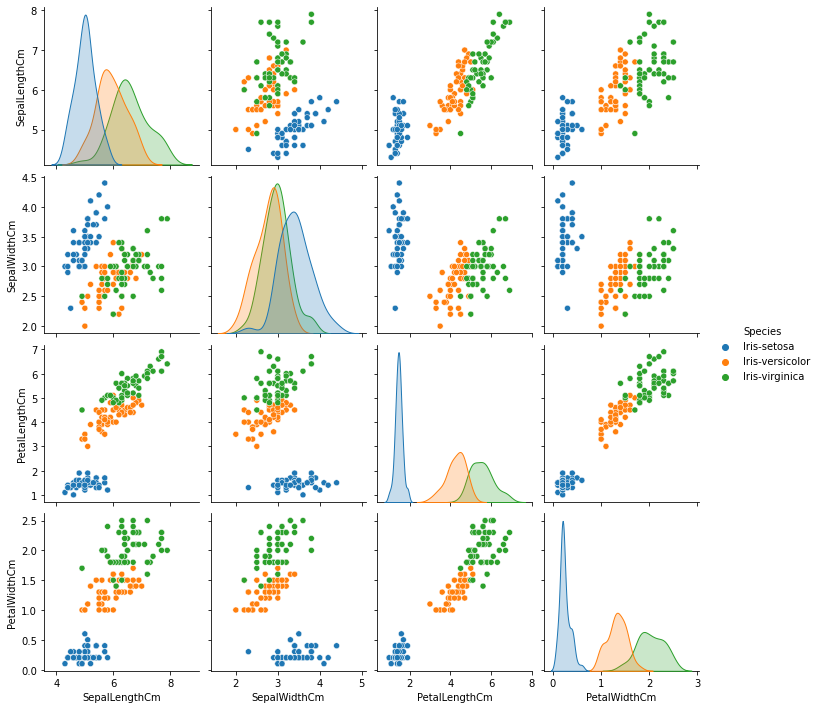

In [62]:
sns.pairplot( data=iris2, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'), hue='Species' )

In [ ]:
# Normalizar los datos

In [64]:
df_norma = iris2[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norma.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [66]:
target = iris2[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
target.head(5)

,Species
0,0
1,0
2,0
3,0
4,0


In [68]:
df = pd.concat([df_norma, target], axis=1)
df.head(100)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
95,0.388889,0.416667,0.542373,0.458333,1
96,0.388889,0.375000,0.542373,0.500000,1
97,0.527778,0.375000,0.559322,0.500000,1
98,0.222222,0.208333,0.338983,0.416667,1


In [69]:
# separando a x y

In [77]:
x=df.iloc[:,:4]

In [75]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [78]:
y =df.iloc[:,-1]

In [79]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [80]:
# Creamos el estimador y lo entrenamos. Nótese que utilizamos solo X! K-Means (Solo para comparar resultados)

est = KMeans(n_clusters = 3)
est.fit(x)

KMeans(n_clusters=3)

<h4> Output K-Means

In [81]:
Output_kMeans=est.labels_

print(Output_kMeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [82]:
df['K-Means']=Output_kMeans
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,K-Means
0,0.222222,0.625000,0.067797,0.041667,0,1
1,0.166667,0.416667,0.067797,0.041667,0,1
2,0.111111,0.500000,0.050847,0.041667,0,1
3,0.083333,0.458333,0.084746,0.041667,0,1
4,0.194444,0.666667,0.067797,0.041667,0,1


<AxesSubplot:title={'center':'K-Means'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

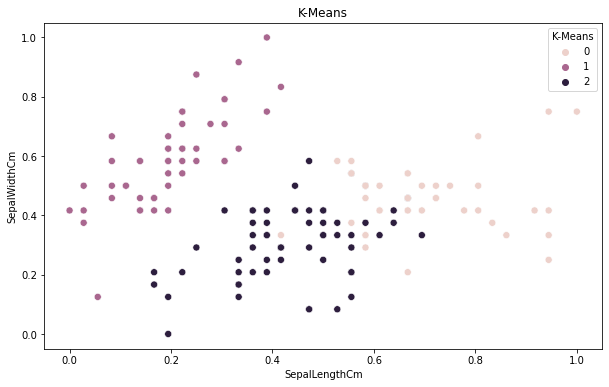

In [83]:
plt.figure(figsize=(10,6))
plt.title("K-Means")
sns.scatterplot(x=df["SepalLengthCm"], y=df["SepalWidthCm"], hue=df["K-Means"], s=50)

# Redes Neuronales usando Keras & Tensorflow

In [90]:
x = iris.data
#y_ = y.reshape(-1, 1) 


#encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

In [91]:
#Entrenamdno nuestro modelo
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

In [92]:
# Contruyendo el modelo

model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

In [93]:
#Optimizador Adam con tasa de aprendizaje de 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\lui_s\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [94]:
print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                50        
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
# Entrenando el mdelo con 300 vueltas
historial=model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=350)

Epoch 1/350
24/24 - 1s - loss: 1.6732 - accuracy: 0.3167 - 620ms/epoch - 26ms/step
Epoch 2/350
24/24 - 0s - loss: 1.1788 - accuracy: 0.3167 - 55ms/epoch - 2ms/step
Epoch 3/350
24/24 - 0s - loss: 1.0127 - accuracy: 0.6000 - 54ms/epoch - 2ms/step
Epoch 4/350
24/24 - 0s - loss: 0.9160 - accuracy: 0.6583 - 52ms/epoch - 2ms/step
Epoch 5/350
24/24 - 0s - loss: 0.8426 - accuracy: 0.6667 - 60ms/epoch - 3ms/step
Epoch 6/350
24/24 - 0s - loss: 0.7774 - accuracy: 0.7833 - 64ms/epoch - 3ms/step
Epoch 7/350
24/24 - 0s - loss: 0.7225 - accuracy: 0.7917 - 60ms/epoch - 2ms/step
Epoch 8/350
24/24 - 0s - loss: 0.6747 - accuracy: 0.8250 - 57ms/epoch - 2ms/step
Epoch 9/350
24/24 - 0s - loss: 0.6326 - accuracy: 0.8250 - 60ms/epoch - 2ms/step
Epoch 10/350
24/24 - 0s - loss: 0.5957 - accuracy: 0.8583 - 55ms/epoch - 2ms/step
Epoch 11/350
24/24 - 0s - loss: 0.5535 - accuracy: 0.9417 - 54ms/epoch - 2ms/step
Epoch 12/350
24/24 - 0s - loss: 0.5190 - accuracy: 0.8667 - 59ms/epoch - 2ms/step
Epoch 13/350
24/24 - 0s

Epoch 101/350
24/24 - 0s - loss: 0.0960 - accuracy: 0.9667 - 54ms/epoch - 2ms/step
Epoch 102/350
24/24 - 0s - loss: 0.0820 - accuracy: 0.9667 - 48ms/epoch - 2ms/step
Epoch 103/350
24/24 - 0s - loss: 0.0822 - accuracy: 0.9667 - 52ms/epoch - 2ms/step
Epoch 104/350
24/24 - 0s - loss: 0.0970 - accuracy: 0.9583 - 57ms/epoch - 2ms/step
Epoch 105/350
24/24 - 0s - loss: 0.0921 - accuracy: 0.9667 - 45ms/epoch - 2ms/step
Epoch 106/350
24/24 - 0s - loss: 0.0869 - accuracy: 0.9750 - 39ms/epoch - 2ms/step
Epoch 107/350
24/24 - 0s - loss: 0.0829 - accuracy: 0.9667 - 51ms/epoch - 2ms/step
Epoch 108/350
24/24 - 0s - loss: 0.0821 - accuracy: 0.9667 - 53ms/epoch - 2ms/step
Epoch 109/350
24/24 - 0s - loss: 0.0791 - accuracy: 0.9667 - 51ms/epoch - 2ms/step
Epoch 110/350
24/24 - 0s - loss: 0.0794 - accuracy: 0.9667 - 62ms/epoch - 3ms/step
Epoch 111/350
24/24 - 0s - loss: 0.0859 - accuracy: 0.9667 - 47ms/epoch - 2ms/step
Epoch 112/350
24/24 - 0s - loss: 0.0854 - accuracy: 0.9750 - 51ms/epoch - 2ms/step
Epoc

Epoch 200/350
24/24 - 0s - loss: 0.0668 - accuracy: 0.9750 - 42ms/epoch - 2ms/step
Epoch 201/350
24/24 - 0s - loss: 0.0685 - accuracy: 0.9750 - 39ms/epoch - 2ms/step
Epoch 202/350
24/24 - 0s - loss: 0.0718 - accuracy: 0.9750 - 45ms/epoch - 2ms/step
Epoch 203/350
24/24 - 0s - loss: 0.0700 - accuracy: 0.9750 - 48ms/epoch - 2ms/step
Epoch 204/350
24/24 - 0s - loss: 0.0750 - accuracy: 0.9667 - 57ms/epoch - 2ms/step
Epoch 205/350
24/24 - 0s - loss: 0.0671 - accuracy: 0.9750 - 44ms/epoch - 2ms/step
Epoch 206/350
24/24 - 0s - loss: 0.0680 - accuracy: 0.9750 - 46ms/epoch - 2ms/step
Epoch 207/350
24/24 - 0s - loss: 0.0692 - accuracy: 0.9667 - 47ms/epoch - 2ms/step
Epoch 208/350
24/24 - 0s - loss: 0.0684 - accuracy: 0.9750 - 43ms/epoch - 2ms/step
Epoch 209/350
24/24 - 0s - loss: 0.0663 - accuracy: 0.9750 - 43ms/epoch - 2ms/step
Epoch 210/350
24/24 - 0s - loss: 0.0688 - accuracy: 0.9833 - 45ms/epoch - 2ms/step
Epoch 211/350
24/24 - 0s - loss: 0.0665 - accuracy: 0.9750 - 45ms/epoch - 2ms/step
Epoc

Epoch 299/350
24/24 - 0s - loss: 0.0656 - accuracy: 0.9833 - 53ms/epoch - 2ms/step
Epoch 300/350
24/24 - 0s - loss: 0.0636 - accuracy: 0.9750 - 69ms/epoch - 3ms/step
Epoch 301/350
24/24 - 0s - loss: 0.0627 - accuracy: 0.9917 - 109ms/epoch - 5ms/step
Epoch 302/350
24/24 - 0s - loss: 0.0590 - accuracy: 0.9833 - 57ms/epoch - 2ms/step
Epoch 303/350
24/24 - 0s - loss: 0.0641 - accuracy: 0.9750 - 58ms/epoch - 2ms/step
Epoch 304/350
24/24 - 0s - loss: 0.0707 - accuracy: 0.9833 - 46ms/epoch - 2ms/step
Epoch 305/350
24/24 - 0s - loss: 0.0642 - accuracy: 0.9750 - 62ms/epoch - 3ms/step
Epoch 306/350
24/24 - 0s - loss: 0.0614 - accuracy: 0.9750 - 60ms/epoch - 2ms/step
Epoch 307/350
24/24 - 0s - loss: 0.0641 - accuracy: 0.9833 - 43ms/epoch - 2ms/step
Epoch 308/350
24/24 - 0s - loss: 0.0637 - accuracy: 0.9833 - 48ms/epoch - 2ms/step
Epoch 309/350
24/24 - 0s - loss: 0.0640 - accuracy: 0.9750 - 102ms/epoch - 4ms/step
Epoch 310/350
24/24 - 0s - loss: 0.0611 - accuracy: 0.9917 - 48ms/epoch - 2ms/step
Ep

In [96]:

# Resultados de la data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 289ms/step - loss: 0.0624 - accuracy: 0.9667
Final test set loss: 0.062379
Final test set accuracy: 0.966667


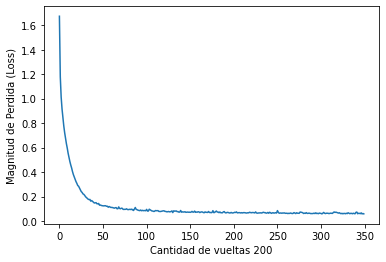

In [97]:
#Función de perdida durante el entrenamiento

plt.xlabel("Cantidad de vueltas 200")
plt.ylabel("Magnitud de Perdida (Loss)")
plt.plot(historial.history["loss"])
plt.show()

In [ ]:
# Encontrando Output de las neuronas

In [102]:
num_inputs = len(x[0])
hidden_layer_neurons = 5
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765],
       [-0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694],
       [ 0.55876584, -0.60462985,  0.72598647,  0.96680135, -0.67231552],
       [ 0.19466789, -0.9820278 , -0.22685743, -0.91167988,  0.91330594]])

In [103]:
num_outputs = len(y[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[-0.12770671,  0.89795461,  0.57261197],
       [ 0.7325786 , -0.65366916, -0.85010283],
       [ 0.20148544, -0.66405563,  0.46676034],
       [-0.18311228,  0.05581765,  0.87514317],
       [ 0.04339224, -0.78361323, -0.68355319]])

In [106]:
#Pesos
    #   Resultados funcion  sigmoide
l1 = 1/(1 + np.exp(-(np.dot(x, w1))))
   
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

In [107]:
yp = np.argmax(l2, axis=1) # Predicción

In [108]:
yp 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [109]:
df["Output_Keras"]=yp

In [110]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,K-Means,Output_Keras
0,0.222222,0.625000,0.067797,0.041667,0,1,0
1,0.166667,0.416667,0.067797,0.041667,0,1,0
2,0.111111,0.500000,0.050847,0.041667,0,1,0
3,0.083333,0.458333,0.084746,0.041667,0,1,0
4,0.194444,0.666667,0.067797,0.041667,0,1,0
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,0,2
146,0.555556,0.208333,0.677966,0.750000,2,2,2
147,0.611111,0.416667,0.711864,0.791667,2,0,2
148,0.527778,0.583333,0.745763,0.916667,2,0,2


<AxesSubplot:title={'center':'Keras'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

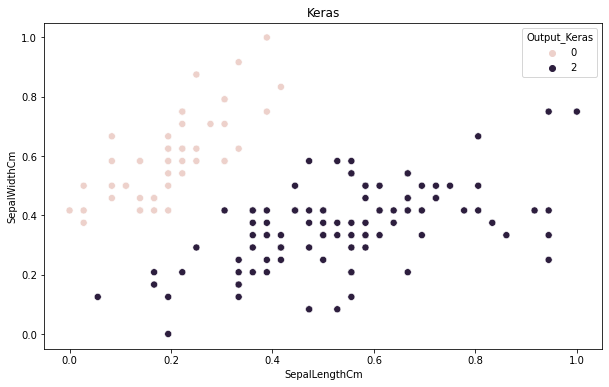

In [111]:
plt.figure(figsize=(10,6))
plt.title("Keras")
sns.scatterplot(x=df["SepalLengthCm"], y=df["SepalWidthCm"], hue=df["Output_Keras"], s=50)